# Open Street Maps

## Basic Imports

In [1]:
%matplotlib inline

In [3]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import osmnx as ox
import geopandas as gpd
import osmium

for module in [pd, gpd]:
    print(module.__name__, module.__version__)

pandas 1.2.0
geopandas 0.9.0


# OSMnx Street Network Analysis

## Load Lisbon

In [3]:
%%time
G = ox.graph_from_place('Lisbon', simplify=True)

CPU times: user 50.5 s, sys: 804 ms, total: 51.3 s
Wall time: 51.4 s


In [4]:
type(G)

networkx.classes.multidigraph.MultiDiGraph

In [5]:
%%time
nodes, streets = ox.graph_to_gdfs(G, nodes=True, edges=True)

CPU times: user 7.68 s, sys: 0 ns, total: 7.68 s
Wall time: 7.67 s


In [6]:
print(f"Num nodes: {len(nodes)}, num edges: {len(streets)}")

Num nodes: 31406, num edges: 77275


In [7]:
nodes.head(5)

,y,x,street_count,ref,highway,geometry
osmid,,,,,,
21270959,38.757318,-9.165944,3,NaN,NaN,POINT (-9.16594 38.75732)
21270962,38.758035,-9.161733,3,NaN,NaN,POINT (-9.16173 38.75804)
21270969,38.763211,-9.136542,3,NaN,NaN,POINT (-9.13654 38.76321)
21272087,38.747959,-9.188383,3,NaN,NaN,POINT (-9.18838 38.74796)
21272088,38.747807,-9.188400,3,NaN,NaN,POINT (-9.18840 38.74781)


In [8]:
streets.head(10)

osmid  oneway   lanes  \
u        v          key                                          
21270959 413210796  0                 22278074    True       3   
21270962 21270959   0    [22278074, 396719604]    True  [4, 3]   
21270969 2265747740 0                 22278381    True       4   
21272087 2688293048 0                396882454   False     NaN   
         21272088   0                396882454   False     NaN   
21272088 4001122643 0                  4515057    True     NaN   
         21272087   0                396882454   False     NaN   
         3997297372 0                396882454   False     NaN   
21424776 299498926  0                  4515071   False     NaN   
         2688293045 0                686463869    True     NaN   

                                                                name  \
u        v          key                                                
21270959 413210796  0    Avenida General Norton de Matos/2ª Circular   
21270962 21270959   0    Avenida General Norton de Matos/2ª Circular   
21270969 2265747740 0    Avenida Marechal Craveiro Lopes/2ª Circular   
21272087 2688293048 0              Rua Professor Reinaldo dos Santos   
         21272088   0              Rua Professor Reinaldo dos Santos   
21272088 4001122643 0                 Rua Manuel Ferreira de Andrade   
         21272087   0              Rua Professor Reinaldo dos Santos   
         3997297372 0              Rua Professor Reinaldo dos Santos   
21424776 299498926  0                               Rua Mariano Pina   
         2688293045 0                    Rotunda Pupilos do Exército   

                             highway maxspeed   length  \
u        v          key                                  
21270959 413210796  0          trunk       80   44.832   
21270962 21270959   0          trunk       80  375.295   
21270969 2265747740 0          trunk       80  269.025   
21272087 2688293048 0    residential      NaN   82.536   
         21272088   0    residential      NaN   16.908   
21272088 4001122643 0    residential      NaN   15.771   
         21272087   0    residential      NaN   16.908   
         3997297372 0    residential      NaN   37.308   
21424776 299498926  0    residential      NaN   47.492   
         2688293045 0    residential      NaN   18.056   

                                                                  geometry  \
u        v          key                                                      
21270959 413210796  0    LINESTRING (-9.16594 38.75732, -9.16646 38.75730)   
21270962 21270959   0    LINESTRING (-9.16173 38.75804, -9.16283 38.757...   
21270969 2265747740 0    LINESTRING (-9.13654 38.76321, -9.13828 38.763...   
21272087 2688293048 0    LINESTRING (-9.18838 38.74796, -9.18832 38.748...   
         21272088   0    LINESTRING (-9.18838 38.74796, -9.18840 38.747...   
21272088 4001122643 0    LINESTRING (-9.18840 38.74781, -9.18822 38.74779)   
         21272087   0    LINESTRING (-9.18840 38.74781, -9.18840 38.747...   
         3997297372 0    LINESTRING (-9.18840 38.74781, -9.18842 38.747...   
21424776 299498926  0    LINESTRING (-9.18809 38.74880, -9.18754 38.74877)   
         2688293045 0    LINESTRING (-9.18809 38.74880, -9.18809 38.748...   

                           junction bridge  ref access width tunnel service  \
u        v          key                                                       
21270959 413210796  0           NaN    NaN  NaN    NaN   NaN    NaN     NaN   
21270962 21270959   0           NaN    NaN  NaN    NaN   NaN    NaN     NaN   
21270969 2265747740 0           NaN    NaN  NaN    NaN   NaN    NaN     NaN   
21272087 2688293048 0           NaN    NaN  NaN    NaN   NaN    NaN     NaN   
         21272088   0           NaN    NaN  NaN    NaN   NaN    NaN     NaN   
21272088 4001122643 0           NaN    NaN  NaN    NaN   NaN    NaN     NaN   
         21272087   0           NaN    NaN  NaN    NaN   NaN    NaN     NaN   
         3997297372 0           NaN   

In [9]:
streets.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
%%time
G_projected = ox.project_graph(G)

CPU times: user 16.9 s, sys: 9.88 ms, total: 16.9 s
Wall time: 16.9 s


In [11]:
%%time
nodes_proj, streets_proj = ox.graph_to_gdfs(
    G_projected, nodes=True, edges=True)

CPU times: user 3.97 s, sys: 0 ns, total: 3.97 s
Wall time: 3.97 s


In [12]:
streets_proj.crs

<Projected CRS: +proj=utm +zone=29 +ellps=WGS84 +datum=WGS84 +unit ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 29N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

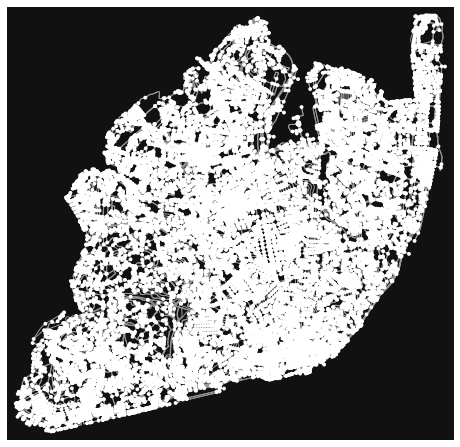

In [13]:
fig, ax = ox.plot_graph(G_projected)

### Other plotting method

In [27]:
import osmnx as ox
city = ox.geocode_to_gdf('Lisbon, Portugal')

<AxesSubplot:>

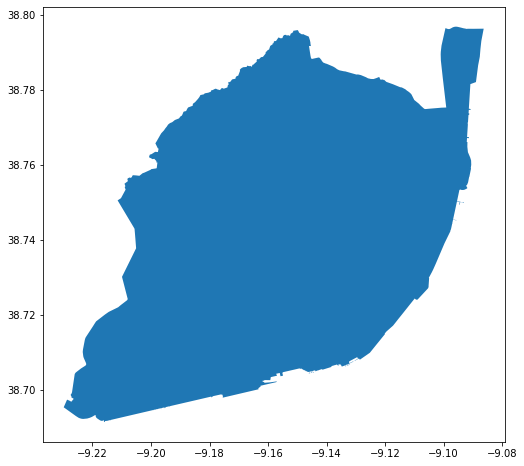

In [15]:
fig, ax = plt.subplots(figsize = (12,8))

city.plot(ax = ax)

In [17]:
streets.plot(ax = ax)

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

## Calculate Basic Stats

In [28]:
%%time
# Get the Convex Hull of the network
convex_hull = streets_proj.unary_union.convex_hull
# Show output
convex_hull

# Calculate the area
area = convex_hull.area

# Calculate statistics with density information
stats = ox.basic_stats(G_projected, area=area)
stats

CPU times: user 9min 58s, sys: 5.87 s, total: 10min 4s
Wall time: 10min 4s


{'n': 31406,
 'm': 77275,
 'k_avg': 4.921034197287143,
 'intersection_count': 27294,
 'streets_per_node_avg': 2.9534483856587914,
 'streets_per_node_counts': {0: 0,
  1: 4112,
  2: 203,
  3: 20465,
  4: 6329,
  5: 260,
  6: 35,
  7: 0,
  8: 1,
  9: 1},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.13093039546583454,
  2: 0.006463733044641151,
  3: 0.6516270776284786,
  4: 0.20152200216519137,
  5: 0.008278672865057632,
  6: 0.0011144367318346813,
  7: 0.0,
  8: 3.1841049480990894e-05,
  9: 3.1841049480990894e-05},
 'edge_length_total': 4056670.247000052,
 'edge_length_avg': 52.49654153348499,
 'street_length_total': 2482553.489000004,
 'street_length_avg': 53.55871351829487,
 'street_segments_count': 46352,
 'node_density_km': 328.58675881333795,
 'intersection_density_km': 285.56476453707086,
 'edge_density_km': 42443.10412138605,
 'street_density_km': 25973.833169816433,
 'circuity_avg': 1.3642150896825718e-05,
 'self_loop_proportion': 0.004218699450016176,
 'clean_intersection_cou

## Extended Stats

%%time
extended_stats = ox.extended_stats(G_projected, ecc=True, cc=True)
series = pd.Series(extended_stats)
series

## Visualize Stats

stats_columns = [
    'avg_neighbor_degree', 
    'degree_centrality', 
    'clustering_coefficient', 
    'pagerank', 
    'eccentricity', 
    'closeness_centrality'
]

series_list = [pd.Series(extended_stats[column_name], name=column_name).sort_index()
               for column_name in stats_columns]
series_list.append(nodes_proj['geometry'].sort_index())

gdf_stats = pd.concat(series_list, axis=1)

gdf_stats = gpd.GeoDataFrame(
    gdf_stats, geometry="geometry", crs=nodes_proj.crs)
gdf_stats.head(2)

nrows, ncols = 2, 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 8))

for idx, column_name in enumerate(stats_columns):
    j = idx % ncols
    i = (idx - j) // ncols
    
    ax = axes[i][j]
    gdf_stats.plot(ax=ax, column=column_name, legend=True, s=6, alpha=0.8)
    ax.set_title(column_name)

nrows, ncols = 2, 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 8))

for idx, column_name in enumerate(stats_columns):
    j = idx % ncols
    i = (idx - j) // ncols
    
    ax = axes[i][j]
    gdf_stats[column_name].plot(ax=ax, kind='hist', bins=100)
    ax.set_title(column_name)

## Lisbon - PyOsmium

In [4]:
from collections import defaultdict

class AmenityStatsHandler(osmium.SimpleHandler):
    def __init__(self):
        super(AmenityStatsHandler, self).__init__()
        self.amenities = defaultdict(int)
    
    def node(self, n):
        for tag in n.tags:
            if tag.k == 'amenity':
                self.amenities[tag.v] += 1

    def way(self, w):
        for tag in w.tags:
            if tag.k == 'amenity':
                self.amenities[tag.v] += 1

    def relation(self, r):
        for tag in r.tags:
            if tag.k == 'amenity':
                self.amenities[tag.v] += 1

In [6]:
%%time
src_filepath = "map_data/Lisbon.osm.pbf"

handler = AmenityStatsHandler()
handler.apply_file(src_filepath)

s_amenities = pd.Series(handler.amenities)

CPU times: user 1min 43s, sys: 741 ms, total: 1min 44s
Wall time: 1min 42s


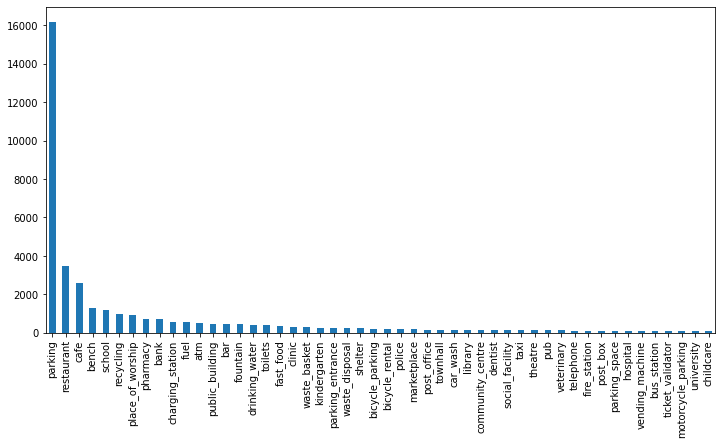

In [8]:
s_amenities.sort_values(ascending=False)[:50] \
  .plot(kind='bar', figsize=(12, 6));

## Porto - PyOsmium

In [10]:
%%time
src_filepath = "map_data/Porto.osm.pbf"

handler = AmenityStatsHandler()
handler.apply_file(src_filepath)

s_amenities = pd.Series(handler.amenities)

CPU times: user 1min 34s, sys: 651 ms, total: 1min 34s
Wall time: 1min 33s


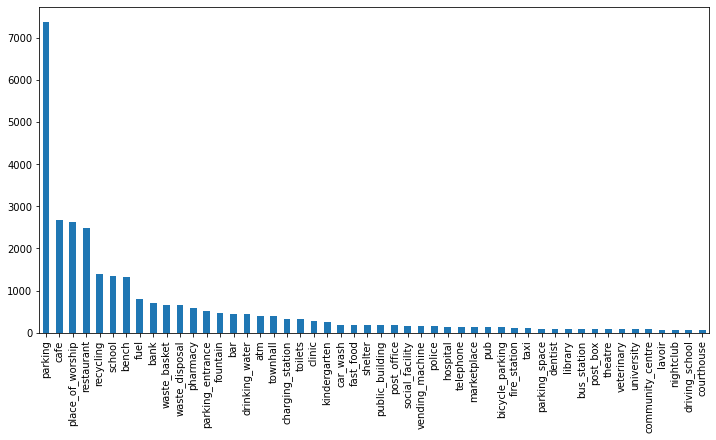

In [11]:
s_amenities.sort_values(ascending=False)[:50] \
  .plot(kind='bar', figsize=(12, 6));

## Lisbon with ogr2ogr

In [2]:
# standard imports
import sys

# import OGR
from osgeo import ogr

!ogrinfo map_data/Lisbon.osm.pbf

INFO: Open of `map_data/Lisbon.osm.pbf'
      using driver `OSM' successful.
1: points (Point)
2: lines (Line String)
3: multilinestrings (Multi Line String)
4: multipolygons (Multi Polygon)
5: other_relations (Geometry Collection)


In [4]:
%%bash
ogr2ogr -f "GPKG" \
    map_data/lisbon-amenities.gpkg \
    map_data/Lisbon.osm.pbf \

0...10...20...30...40...50...60...70...80...90...100 - done.


In [5]:
gdf = gpd.read_file("map_data/lisbon-amenities.gpkg", driver='GPKG')
gdf.shape

(99120, 12)

In [15]:
gdf.head(100)

,osm_id,name,amenity,barrier,highway,ref,address,is_in,place,man_made,other_tags,geometry
0,20629108,Lapa da Serra,None,None,None,None,None,None,neighbourhood,None,None,POINT (-9.39964 38.95586)
1,20629118,None,None,None,crossing,None,None,None,None,None,None,POINT (-9.41390 38.96183)
2,21272086,None,None,None,crossing,None,None,None,None,None,"""crossing""=>""uncontrolled"",""crossing_ref""=>""ze...",POINT (-9.18832 38.74858)
3,21404046,None,None,None,bus_stop,None,None,None,None,None,None,POINT (-9.45296 38.75312)
4,21404049,None,None,None,bus_stop,None,None,None,None,None,None,POINT (-9.45655 38.75241)
...,...,...,...,...,...,...,...,...,...,...,...,...
95,26233950,None,None,None,motorway_junction,2,None,None,None,None,"""exit_to""=>""Sintra;Amadora;Queluz""",POINT (-9.27602 38.74167)
96,26234026,None,None,None,motorway_junction,6,None,None,None,None,"""exit_to""=>""Caxias;CREL;Loures""",POINT (-9.26583 38.71469)
97,26236366,None,None,None,motorway_junction,4,None,None,None,None,"""exit_to""=>""Loures;Caneças;Odivelas""",POINT (-9.19490 38.82235)
98,26236391,None,None,None,motorway_junction,5,None,None,None,None,"""exit_to""=>""Leiria;Loures""",POINT (-9.18031 38.84989)


In [10]:
gdf['amenity'].notnull().sum()

17541

In [13]:
gdf['geometry'].nunique()

99091

In [19]:
gdf['geometry'].isna().sum()

0

In [20]:
from shapely import wkt
gdf['str_geom'] = gdf.geometry.apply(lambda x: wkt.dumps(x))

In [21]:
gdf['str_geom'].start

,osm_id,name,amenity,barrier,highway,ref,address,is_in,place,man_made,other_tags,geometry,str_geom
0,20629108,Lapa da Serra,None,None,None,None,None,None,neighbourhood,None,None,POINT (-9.39964 38.95586),POINT (-9.3996379000000001 38.9558610000000058)
1,20629118,None,None,None,crossing,None,None,None,None,None,None,POINT (-9.41390 38.96183),POINT (-9.4139011999999997 38.9618338000000008)
2,21272086,None,None,None,crossing,None,None,None,None,None,"""crossing""=>""uncontrolled"",""crossing_ref""=>""ze...",POINT (-9.18832 38.74858),POINT (-9.1883154999999999 38.7485788000000042)
3,21404046,None,None,None,bus_stop,None,None,None,None,None,None,POINT (-9.45296 38.75312),POINT (-9.4529636999999997 38.7531211000000013)
4,21404049,None,None,None,bus_stop,None,None,None,None,None,None,POINT (-9.45655 38.75241),POINT (-9.4565549999999998 38.7524073000000016)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99115,8641657617,None,None,None,None,None,None,None,None,windmill,None,POINT (-9.25846 38.83832),POINT (-9.2584554000000008 38.8383180000000010)
99116,8641657618,None,None,None,None,None,None,None,None,windmill,None,POINT (-9.26068 38.83765),POINT (-9.2606833000000002 38.8376504000000011)
99117,8641657619,None,None,None,None,None,None,None,None,windmill,None,POINT (-9.25440 38.84683),POINT (-9.2543986000000000 38.8468313999999992)
99118,8641657620,None,None,None,None,None,None,None,None,windmill,None,POINT (-9.25396 38.84726),POINT (-9.2539616000000002 38.8472583000000000)


In [25]:
gdf['geometry'].geometry[0].type

'Point'

In [33]:
sum(gdf['str_geom'].str.startswith('POINT')) #all points

99120

In [31]:
gdf['amenity'].notnull()

0        False
1        False
2        False
3        False
4        False
         ...  
99115    False
99116    False
99117    False
99118    False
99119    False
Name: amenity, Length: 99120, dtype: bool